In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
csv_file_name = '2024-01-03.csv'
df = pd.read_csv(csv_file_name)

PROCESADO DE DATA

In [3]:
df = df.sort_values(by='t')
df = df[0:8000]

In [4]:
df.reset_index(drop=True, inplace=True)
df_put = df[df['type'] == 'PUT']
df_call = df[df['type'] == 'CALL']

In [5]:
df['call_c'] = df.apply(lambda row: row['c'] if row['type'] == 'CALL' else None, axis=1)
df['call_p'] = df.apply(lambda row: row['c'] if row['type'] == 'PUT' else None, axis=1)

df['call_V'] = df.apply(lambda row: row['v'] if row['type'] == 'CALL' else None, axis=1)
df['put_V'] = df.apply(lambda row: row['v'] if row['type'] == 'PUT' else None, axis=1)

df = df.fillna(0)

In [6]:
def replace_zero_with_above(series):
    for i in range(1, len(series)):
        if series.iloc[i] == 0:
            series.iloc[i] = series.iloc[i - 1]
    return series

# Apply the function to the 'call_c' column
df['call_c'] = replace_zero_with_above(df['call_c'])
df['call_p'] = replace_zero_with_above(df['call_p'])

def replace_zero_with_above(series):
    for i in range(1, len(series)):
        if series.iloc[i] == 0:
            series.iloc[i] = series.iloc[i - 1]
    return series

# Apply the function to the 'call_c' column
df['call_p'] = replace_zero_with_above(df['call_p'])

In [7]:
df['df_portf'] = df['call_c']+df['call_p']
initial_cost = df.loc[1, 'df_portf']
print(initial_cost)
df['Profit'] = df['df_portf']-(initial_cost)

0.24


In [8]:
#pd.set_option('display.max_rows', None)
df = df.drop(columns=['vw','o','h','l','stock','dte', 'date','ticker'])

In [9]:
df

,v,c,t,n,underlying_price,type,strike,datetime,call_c,call_p,call_V,put_V,df_portf,Profit
0,49,0.24,1704292200000,10,470.43,CALL,473,2024-01-03 14:30:00,0.24,0.00,49.00,0.00,0.24,0.00
1,7,0.24,1704292201000,2,470.43,CALL,473,2024-01-03 14:30:01,0.24,0.00,7.00,0.00,0.24,0.00
2,2,0.23,1704292202000,1,470.43,CALL,473,2024-01-03 14:30:02,0.23,0.00,2.00,0.00,0.23,-0.01
3,1,0.15,1704292202000,1,470.43,PUT,467,2024-01-03 14:30:02,0.23,0.15,0.00,1.00,0.38,0.14
4,23,0.15,1704292203000,4,470.43,PUT,467,2024-01-03 14:30:03,0.23,0.15,0.00,23.00,0.38,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1,0.06,1704303818000,1,469.93,CALL,473,2024-01-03 17:43:38,0.06,0.07,1.00,0.00,0.13,-0.11
7996,1,0.06,1704303823000,1,469.93,PUT,467,2024-01-03 17:43:43,0.06,0.06,0.00,1.00,0.12,-0.12
7997,5,0.06,1704303824000,1,469.93,CALL,473,2024-01-03 17:43:44,0.06,0.06,5.00,0.00,0.12,-0.12
7998,6,0.07,1704303827000,2,469.93,PUT,467,2024-01-03 17:43:47,0.06,0.07,0.00,6.00,0.13,-0.11


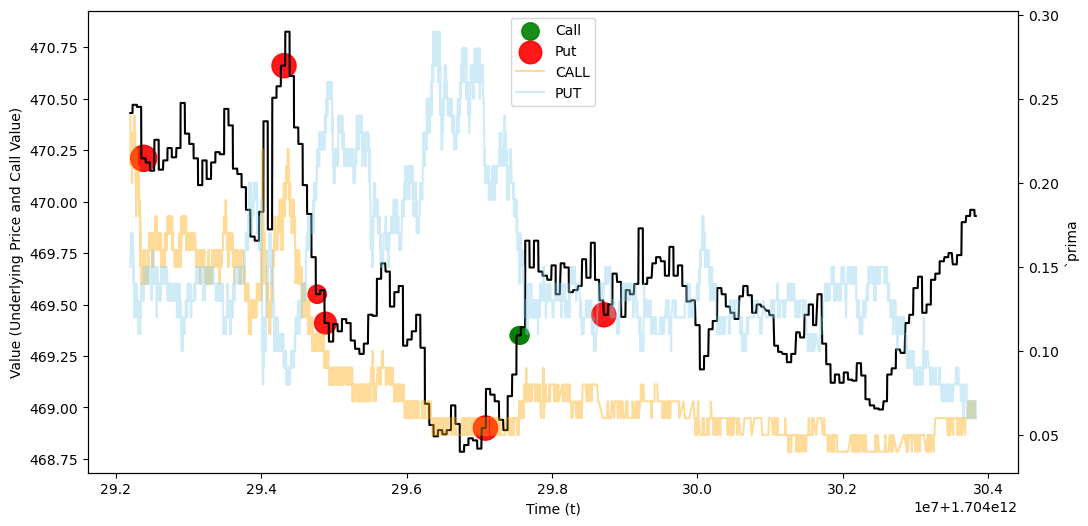

In [10]:
dot_size_call = 0.1
dot_size_put = dot_size_call
size_threshold = 150

fig, ax1 = plt.subplots(figsize=(12, 6))  
ax1.plot(df['t'], df['underlying_price'], color='black')

filtered_df_call = df[df['call_V'] * dot_size_call > size_threshold]
filtered_df_put = df[df['put_V'] * dot_size_put > size_threshold]
scatter_call = ax1.scatter(filtered_df_call['t'], filtered_df_call['underlying_price'], c='green', s=filtered_df_call['call_V'] * dot_size_call, alpha=0.9, label='Call')
scatter_put = ax1.scatter(filtered_df_put['t'], filtered_df_put['underlying_price'], c='red', s=filtered_df_put['put_V'] * dot_size_put, alpha=0.9, label='Put')

ax1.set_xlabel('Time (t)')
ax1.set_ylabel('Value (Underlying Price and Call Value)')
ax2 = ax1.twinx()
ax2.plot(df_call['t'], df_call['c'], linestyle='-', label='CALL', color='orange', alpha=0.4)
ax2.plot(df_put['t'], df_put['c'], linestyle='-', label='PUT', color='skyblue', alpha=0.4)
ax2.set_ylabel('`prima')
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center')
plt.savefig(f'{csv_file_name}_plot.png')
plt.show()

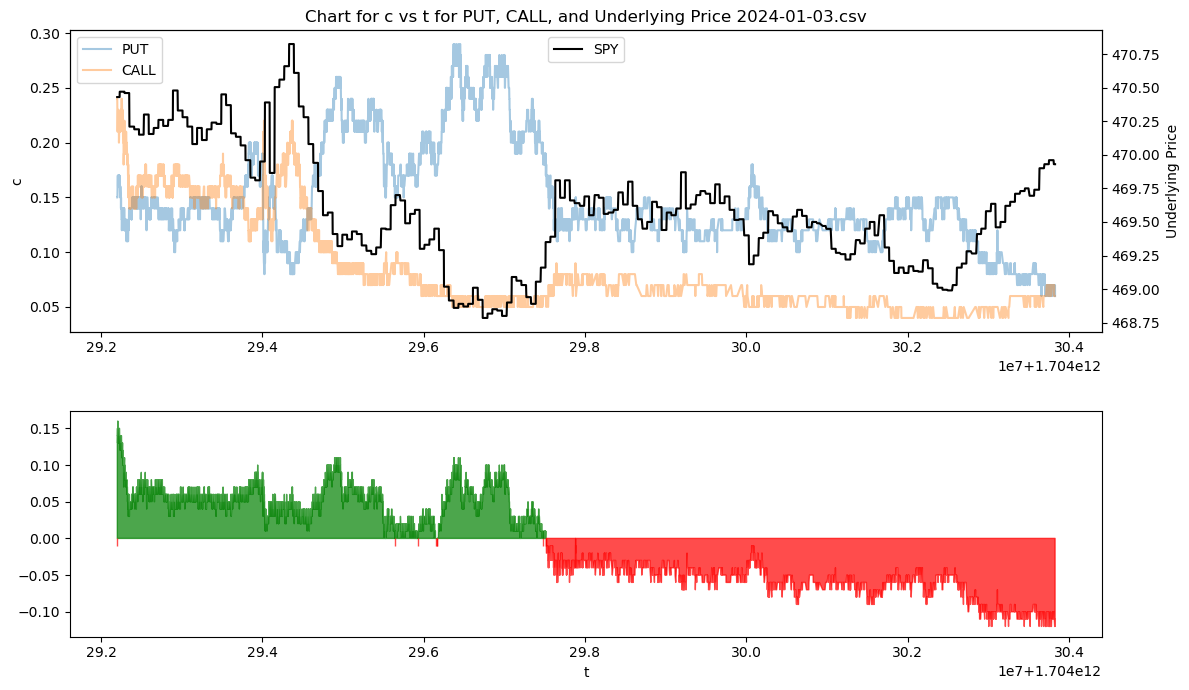

In [11]:
# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 7), gridspec_kw={'height_ratios': [4,3]})  # Adjust the height ratios

# Plot for type == 'PUT' in the first subplot
ax1.plot(df_put['t'], df_put['c'], linestyle='-', label='PUT', alpha=0.4)
# Plot for type == 'CALL' in the first subplot
ax1.plot(df_call['t'], df_call['c'], linestyle='-', label='CALL', alpha=0.4)
# Adding labels and title for the first subplot
ax1.set_ylabel('c')
ax1.set_title(f'Chart for c vs t for PUT, CALL, and Underlying Price {csv_file_name}')
ax1.legend(loc='upper left')

# Create a secondary y-axis for underlying_price
ax3 = ax1.twinx()
ax3.plot(df['t'], df['underlying_price'], color='black', linestyle='-', label='SPY', alpha=1)
ax3.set_ylabel('Underlying Price')
ax3.legend(loc='upper center')

# Plot for df in the second subplot as an area chart with different colors for positive and negative values
# Area above zero
ax2.fill_between(df['t'], df['Profit'], where=(df['Profit'] >= 0), color='green', alpha=0.7)
# Area below zero
ax2.fill_between(df['t'], df['Profit'], where=(df['Profit'] < 0), color='red', alpha=0.7)
# Adding labels and title for the second subplot
ax2.set_xlabel('t')

# Adjust layout and display the plot
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)  # Adjust horizontal space between plots
plt.show()

In [12]:
long = len(df) - 1  # Get the index of the last row
cum = df.loc[long, 'Profit']  # Access the 'Profit' value of the last row
print('El Beneficio acumulado es:' +str(cum))

El Beneficio acumulado es:-0.12


In [13]:
df = df.reindex(columns=['t','datetime','strike','type', 'c','call_c', 'call_p','n', 'v', 'call_V', 'put_V',  'underlying_price', 'df_portf', 'Profit'])

In [21]:
ballenas = 300
df['abs_P'] = False
df['abs_C'] = False
df.loc[df['put_V'] > ballenas, 'ball_P'] = df['put_V']
df.loc[df['call_V'] > ballenas, 'ball_C'] = df['call_V']


In [15]:
def scale_sizes(values, min_size=30, max_size=300):
    norm = plt.Normalize(values.min(), values.max())
    return norm(values) * (max_size - min_size) + min_size

In [23]:
absorcion_threshold = 500
for i in range(len(df) - absorcion_threshold):
    if not pd.isna(df.loc[i, 'ball_P']):
        if df.loc[i + absorcion_threshold, 'underlying_price'] > df.loc[i, 'underlying_price']:
            df.loc[i, 'abs_P'] = True
    if not pd.isna(df.loc[i, 'ball_C']):
        if df.loc[i + absorcion_threshold, 'underlying_price'] < df.loc[i, 'underlying_price']:
            df.loc[i, 'abs_C'] = True           

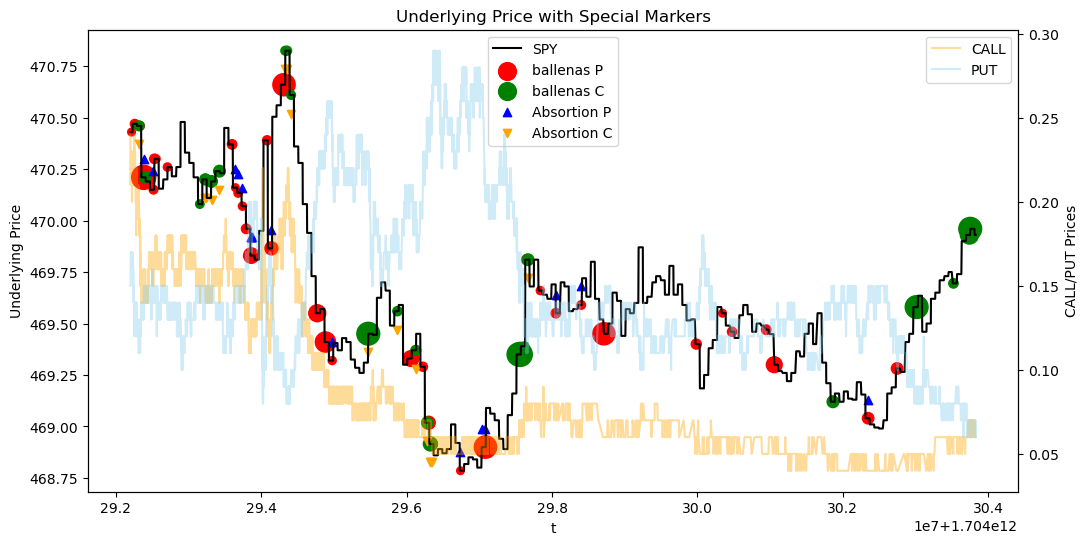

In [25]:
# Scale the sizes of the dots based on ball_P and ball_C values
offset = 0.09
sizes_P = scale_sizes(df['ball_P'].dropna())
sizes_C = scale_sizes(df['ball_C'].dropna())

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df['t'], df['underlying_price'], label='SPY', color='black')

# Add red dots where ball_P is not NaN
ax1.scatter(df['t'][df['ball_P'].notna()], df['underlying_price'][df['ball_P'].notna()], color='red', label='ballenas P', s=sizes_P)
ax1.scatter(df['t'][df['ball_C'].notna()], df['underlying_price'][df['ball_C'].notna()], color='green', label='ballenas C', s=sizes_C)

# Add blue upward triangles where abs_P is True
ax1.scatter(df['t'][df['abs_P']], df['underlying_price'][df['abs_P']] + offset, color='blue', marker='^', label='Absortion P')
ax1.scatter(df['t'][df['abs_C']], df['underlying_price'][df['abs_C']] - offset, color='orange', marker='v', label='Absortion C')

ax1.set_xlabel('t')
ax1.set_ylabel('Underlying Price')
ax1.legend(loc='upper center')

# Create a second y-axis for CALL and PUT lines
ax2 = ax1.twinx()

ax2.plot(df_call['t'], df_call['c'], linestyle='-', label='CALL', color='orange', alpha=0.4)
ax2.plot(df_put['t'], df_put['c'], linestyle='-', label='PUT', color='skyblue', alpha=0.4)

ax2.set_ylabel('CALL/PUT Prices')
ax2.legend(loc='upper right')

plt.title('Underlying Price with Special Markers')
plt.show()